# Example of PLQE class

In [1]:
%load_ext autoreload
%autoreload 2
from analysis import *
import pathlib as p

I am running __init__


In [2]:
## fill in the path to the analysis folder
folder = p.PurePath('')
dpl = Plqe(
    folder.joinpath('data\\PLQE\\12\\12_'),
    setup='CPT',
    footer=35
)

Class instance of <class 'analysis.experiments.plqe.Plqe'>
LOADING: 12_DPA_polymer_toluene_405nm_80uW_Si_20x0p5s_ON.asc as ON
LOADING: 12_DPA_polymer_toluene_405nm_80uW_Si_20x0p5s_OFF.asc as OFF
LOADING: 12_DPA_polymer_toluene_405nm_80uW_Si_20x0p5s_NO.asc as NO
PLQE experimental data


No calibrated performed, plotting raw data.
detector already defined: Si
center WL is (600,)
Calibrating current RawData:


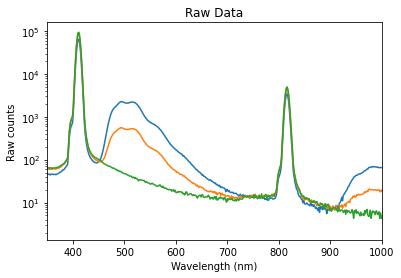

In [3]:
f1 = dpl.plot_plqe(yscale='log', xlim=(350,1000))
dpl.calibrate()

Calibration: True
 Bgd subtracted: False
 Data combined: False
 Filter: False
Background Subtracted
recalibrating data...


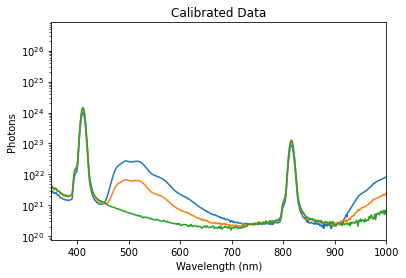

In [4]:
f2 = dpl.plot_plqe(yscale='log', xlim=(350,1000))
dpl.rem_bg(760)

Calibration: True
 Bgd subtracted: True
 Data combined: False
 Filter: False


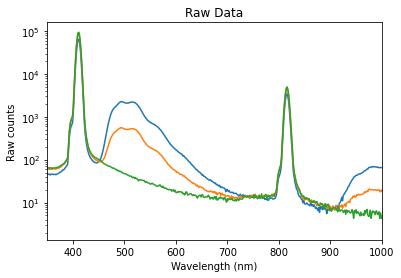

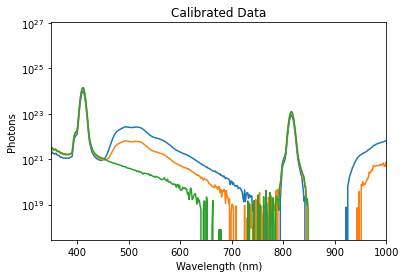

In [5]:
f3 = dpl.plot_plqe_raw(yscale='log', xlim=(350,1000))
f3 = dpl.plot_plqe(yscale='log', xlim=(350,1000))

Calibration: True
 Bgd subtracted: True
 Data combined: False
 Filter: False
The absorption between (395, 420) nm is: 0.26760066161503326
The PLQE between (460, 700) nm is: 49.01 %


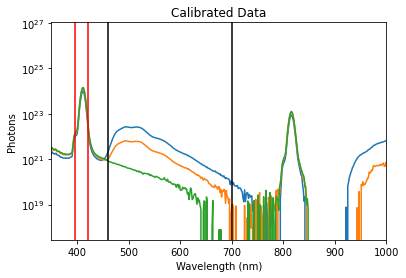

In [6]:
dpl.calc_plqe(exc_wl=(395,420), pl_wl=(460,700), xlim=(350,1000), yscale='log')

## Vis and IR PLQE

In [7]:
pl = Plqe(
    folder.joinpath('data\\PLQE\\1.3\\TIPS_TACA_PBS'),
    setup='CPT',
    footer=35,
    delimiter=''
)

Class instance of <class 'analysis.experiments.plqe.Plqe'>
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_ONLAS.asc as ONLAS
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_OFFLAS.asc as OFFLAS
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_850LP_ONPL.asc as ONPL
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_850LP_OFFPL.asc as OFFPL
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_NO.asc as NO
Measurements combined
PLQE experimental data


In [8]:
pl.data_raw.shape

(776, 3)

In [9]:
pl.calibrate(detector='InGaAs',center_wl=[800,1200])

detector already defined: InGaAs
center WL is [800, 1200]
Calibrating current RawData:


['ONLAS', 'OFFLAS', 'ONPL', 'OFFPL', 'NO']
Calibration: True
 Bgd subtracted: False
 Data combined: True
 Filter: False
Background Subtracted
recalibrating data...


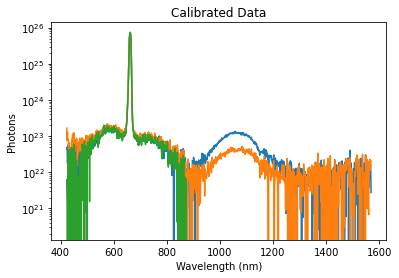

In [10]:
print(pl.key)
# pl.plot_plqe(type='Cal',yscale='log',xmin=500,xmax=1400)
f = pl.plot_plqe(yscale='log') 
#Xan remove background or reset all manipulations to rawdata.
pl.rem_bg(800)
#data.resetDefVals()

Calibration: True
 Bgd subtracted: True
 Data combined: True
 Filter: False
The absorption between [640, 680] nm is: 0.07164829881600043
The PLQE between [880, 1350] nm is: 37.19 %


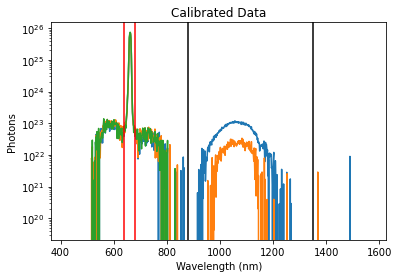

In [11]:
## Calculating the PLQE
pl.calc_plqe(exc_wl=[640,680],pl_wl = [880,1350], yscale='log')